In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


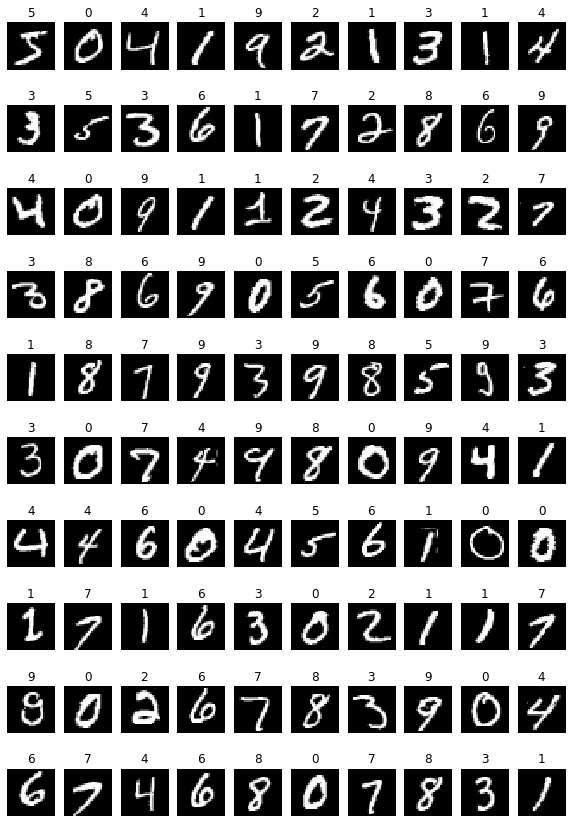

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,15))

for i in range(100):
    plt.subplot(10, 10, i + 1, xticks=[], yticks=[])
    plt.title(y_train[i].argmax())
    plt.axis('off')
    plt.imshow(x_train[i].reshape((28, 28)), cmap='gray')

In [9]:
#空のネットワークを作成
model = Sequential()
#Denseは密という意　ニューロンの繋げ方
#20個のニューロン、入力が784次元(28*28)、ReLuを使う
model.add(Dense(20,activation='relu', input_shape=(784,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
#出力はソフトマックス、10個に分類する
model.add(Dense(10,activation='softmax'))

model.summary()
#lossは悪さの指標、optimizerは勾配法
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_18 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_19 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                210       
Total params: 16,750
Trainable params: 16,750
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0624 00:54:51.652798 139715369326464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0624 00:54:51.903552 139715369326464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.6271 - acc: 0.8283 - val_loss: 0.3005 - val_acc: 0.9113
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.2671 - acc: 0.9222 - val_loss: 0.2302 - val_acc: 0.9306
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.2184 - acc: 0.9366 - val_loss: 0.2032 - val_acc: 0.9408
Epoch 4/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.1918 - acc: 0.9437 - val_loss: 0.2087 - val_acc: 0.9386
Epoch 5/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.1752 - acc: 0.9487 - val_loss: 0.1795 - val_acc: 0.9475
Epoch 6/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.1626 - acc: 0.9520 - val_loss: 0.1719 - val_acc: 0.9494
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.1516 - acc: 0.9556 - val_loss: 0.1636 - val_acc

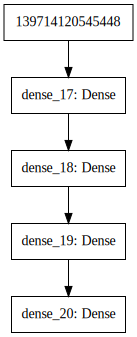

In [11]:
!apt-get -qq install -y graphviz && pip install -q pydot

import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

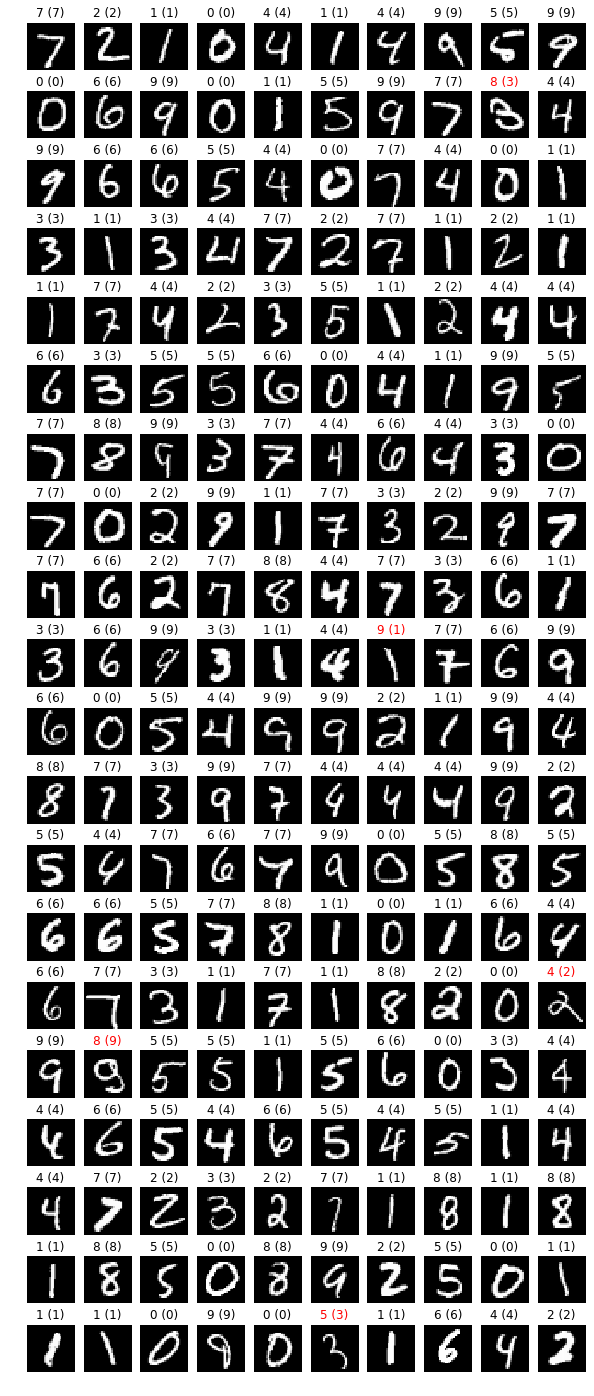

In [12]:
results = model.predict(x_test)

plt.figure(figsize=(10,25))

for i in range(200):
  label = results[i].argmax()
  gt_label = y_test[i].argmax()
  
  plt.subplot(20, 10, i+1)
  if label == gt_label:
    title_color = 'black'
  else:
    title_color = 'red'
  plt.title(str(label) + ' (' + str(gt_label) + ')', color=title_color)
  plt.axis('off')
  plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')

plt.show()